# College Majors and their Graduates Salary Research
### Data from https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their?select=recent-grads.csv
Author: Haowei Li

In [71]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# import data from data folder, all-ages, grad-students, and recent-grads (csv files)
all_ages = pd.read_csv("data/all-ages.csv")
grad_students = pd.read_csv("data/grad-students.csv")
recent_grads = pd.read_csv("data/recent-grads.csv")

# all_ages  has Major, Major_category, Total, Employed, Unemployed, Unemployment_rate, Median, P25th, P75th as columns
# grad_students has Major, Major_category, Grad_Total, Grad_Employed, Grad_Unemployed, Grad_Unemployment_rate, Grad_median, Grad_P25, Grad_P75, ,Nongrad_median, Nongrad_P25, Nongrad_P75 as columns
# recent_grads has Rank, Major, Major_category, Men, Women, ShareWomen, Unemployment_rate, Median, P25th, P75th as its columns

In [73]:
# sort all_ages by Major
all_ages = all_ages.sort_values("Major")
# sort recent_grads by Major
recent_grads = recent_grads.sort_values("Major")
# sort grad_students by Major
grad_students = grad_students.sort_values("Major")
# save the sorted dataframes to csv files
all_ages.to_csv("data/all-ages.csv", index=False)
recent_grads.to_csv("data/recent-grads.csv", index=False)
grad_students.to_csv("data/grad-students.csv", index=False)

In [74]:
# create a new dataframe
new_df = pd.DataFrame(columns=["Major", "Median_all_ages", "Median_recent_grads", "Grad_median", "Nongrad_median", "Unemployment_rate_all_ages", "Unemployment_rate_recent_grads", "Grad_Unemployment_rate", "Nongrad_Unemployment_rate", "Num_of_men", "Num_of_woman"])
# add Major column
new_df["Major"] = recent_grads["Major"]
# add Median_all_ages column
new_df["Median_all_ages"] = all_ages["Median"]
# add Median_recent_grads column
new_df["Median_recent_grads"] = recent_grads["Median"]
# add Grad_median column
new_df["Grad_median"] = grad_students["Grad_median"]
# add Nongrad_median column
new_df["Nongrad_median"] = grad_students["Nongrad_median"]
# add Unemployment_rate_all_ages column
new_df["Unemployment_rate_all_ages"] = all_ages["Unemployment_rate"]
# add Unemployment_rate_recent_grads column
new_df["Unemployment_rate_recent_grads"] = recent_grads["Unemployment_rate"]
# add Grad_Unemployment_rate column
new_df["Grad_unemployment_rate"] = grad_students["Grad_unemployment_rate"]
# add Nongrad_Unemployment_rate column
new_df["Nongrad_Unemployment_rate"] = grad_students["Nongrad_unemployed"]
# add Num_of_men column
new_df["Num_of_men"] = recent_grads['Men']
# add Num_of_woman column
new_df["Num_of_women"] = recent_grads['Women']

# save the new dataframe to a csv file
new_df.to_csv("data/new_df.csv", index=False)

<Axes: title={'center': 'Top 10 Highest Median Salary'}, xlabel='Major'>

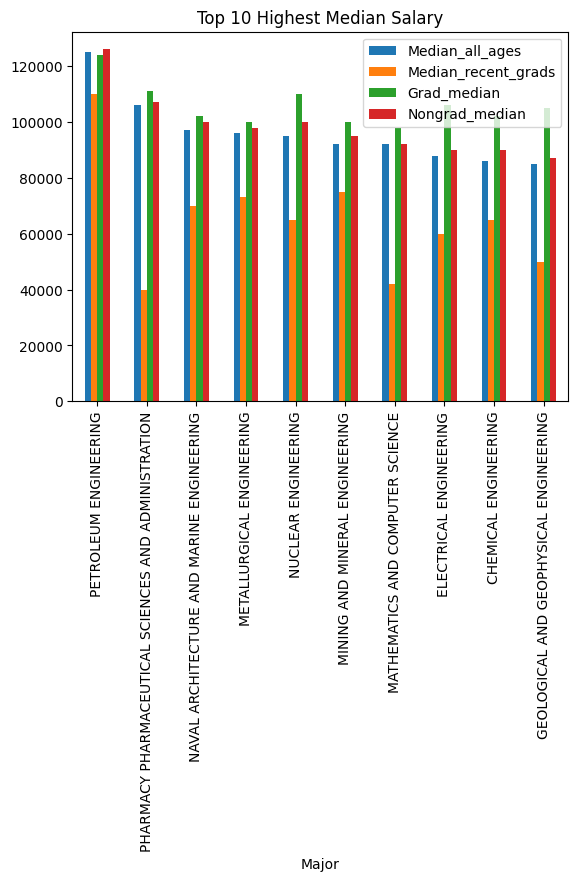

In [75]:
# top 10 majors with the highest Median_all_ages
top_10_median_all_ages = new_df.sort_values("Median_all_ages", ascending=False).head(10)
# display top 10 majors with the highest Median_all_ages and Median_recent_grads in a bar chart
top_10_median_all_ages.plot.bar(x="Major", y=["Median_all_ages", "Median_recent_grads", "Grad_median", "Nongrad_median"], title="Top 10 Highest Median Salary", legend=True)

In [76]:
# compare the average difference between Grad_Median and NonGrad_Median
grad_median = new_df["Grad_median"].mean().round(2)
nongrad_median = new_df["Nongrad_median"].mean().round(2)
# display the average difference between Grad_Median and NonGrad_Median
print("The average difference between Grad_Median and NonGrad_Median is: " + str(grad_median - nongrad_median))

The average difference between Grad_Median and NonGrad_Median is: 18171.96


# Is Graduate School Worth it?
Yes, with only 1-2 years of study, people averagely can make 18172 dollars more annually, so it is definitely a win in long run

In [83]:
# Man average income
average_income_of_men = (new_df['Median_all_ages'] * new_df['Num_of_men']).sum() / new_df['Num_of_men'].sum()
print("Man average income: ", average_income_of_men)
# Woman average income
average_income_of_women = (new_df['Median_all_ages'] * new_df['Num_of_women']).sum() / new_df['Num_of_women'].sum()
print("Woman average income: ", average_income_of_women)
print("Difference: ", average_income_of_men - average_income_of_women)


Man average income:  57853.883227488244
Woman average income:  52373.01354729598
Difference:  5480.869680192263


<Axes: title={'center': 'Top 30 Highest Median Salary'}, xlabel='Major'>

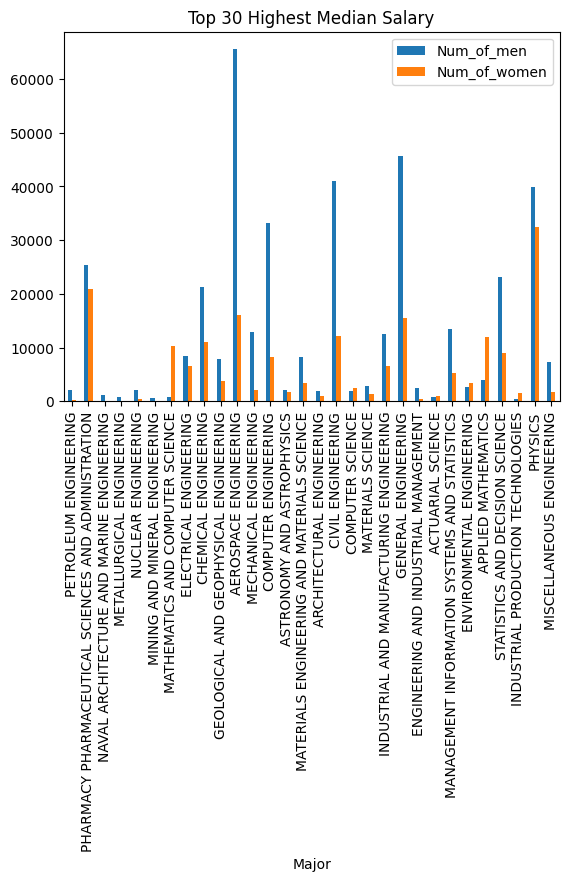

In [82]:
# print the top 30 highest median salary with gender ratio
top_20_median_all_ages = new_df.sort_values("Median_all_ages", ascending=False).head(30)
top_20_median_all_ages.plot.bar(x="Major", y=["Num_of_men", "Num_of_women"], title="Top 30 Highest Median Salary", legend=True)

# Gender summary
In short, gender pay gap myth is busted, with about 5481 dollars of pay differences across all majors, regarding the top paying majors are predominantly male.